In [1]:
import shutil
import os
import pathlib
import numpy as np
import pandas as pd
import plotly.express as px
import kaggle
import datetime
import tensorflow as tf

from functools import partial

ModuleNotFoundError: No module named 'plotly'

# Implmentation Outline
- Do pretraining for image classification to learn features
- Convert model to object detection
- Make custom loss function
- Get object detection dataset
- Train according to paper specifications
- Test model

## Pretraining

For pretraining I will use a smaller version of the ImageNet dataset then the one used in the paper.

In [ ]:
## Load pretraining data
kaggle.api.authenticate()
# kaggle.api.dataset_download_files('ifigotin/imagenetmini-1000',
#                                 path='/home/misha/Desktop/data/yolo_paper/pretrain_data/image_data/',
#                                 unzip=True)

### Data Preprocessing

In [2]:
PRETRAIN_DATA_PATH = '/home/misha/Desktop/data/yolo_paper/pretrain_data/'
labels_txt = PRETRAIN_DATA_PATH + 'words.txt'

In [3]:
labels = pd.read_csv(labels_txt, sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: '/home/misha/Desktop/data/yolo_paper/pretrain_data/words.txt'

In [5]:
labels

,code,object
0,n00001740,entity
1,n00001930,physical entity
2,n00002137,"abstraction, abstract entity"
3,n00002452,thing
4,n00002684,"object, physical object"
...,...,...
82110,n15299225,study hall
82111,n15299367,"Transfiguration, Transfiguration Day, August 6"
82112,n15299585,usance
82113,n15299783,window


In [6]:
# labels[labels['code'] == 'n03485794214']['object'].values[0]

In [7]:
n_classes = len(os.listdir(PRETRAIN_DATA_PATH + 'image_data/imagenet-mini/train/'))

In [8]:
n_classes

999

In [9]:
len(os.listdir(PRETRAIN_DATA_PATH + 'image_data/imagenet-mini/val/'))

999

In [10]:
os.listdir(PRETRAIN_DATA_PATH + 'image_data/imagenet-mini/val/') == os.listdir(PRETRAIN_DATA_PATH + 'image_data/imagenet-mini/train/')

True

In [11]:
os.listdir(PRETRAIN_DATA_PATH + 'image_data/imagenet-mini/')

['val', 'train']

#### Rename the folders to their label instead of the code

In [12]:
# for split in os.listdir(PRETRAIN_DATA_PATH + 'image_data/imagenet-mini/'):
#     for folder in os.listdir(PRETRAIN_DATA_PATH + 'image_data/imagenet-mini/' + split):
#         try:
#             label = labels[labels['code'] == folder]['object'].values[0]
#         except IndexError as err:
#             print(f"No label found for Split: {split} Folder: {folder}")
#             continue

#         ## Rename folder
#         source_path = PRETRAIN_DATA_PATH + f'image_data/imagenet-mini/{split}/{folder}'
#         destination_path = PRETRAIN_DATA_PATH + f'image_data/imagenet-mini/{split}/{label}'

#         try:
#             shutil.move(source_path, destination_path)
#         except OSError as err:
#             print(f"Error moving folder({folder}): {err}")

In [13]:
os.listdir(PRETRAIN_DATA_PATH + 'image_data/imagenet-mini/val/') == os.listdir(PRETRAIN_DATA_PATH + 'image_data/imagenet-mini/train/')

True

#### Move load data into Tensorflow datasets.

In [14]:
train_dir = pathlib.Path(PRETRAIN_DATA_PATH + 'image_data/imagenet-mini/train/')
val_dir = pathlib.Path(PRETRAIN_DATA_PATH + 'image_data/imagenet-mini/val/')

In [15]:
train_df = tf.keras.utils.image_dataset_from_directory(
    train_dir, 
    labels='inferred',
    color_mode='rgb',
    batch_size=32, 
    label_mode='categorical',   ## Vector Representation (Use categorical_crossentropy loss)
    image_size=(224, 224),
    crop_to_aspect_ratio=True,
    seed=1, 
    shuffle=True
)
val_df = tf.keras.utils.image_dataset_from_directory(
    val_dir, 
    labels='inferred',
    color_mode='rgb',
    batch_size=32, 
    label_mode='categorical',   ## Vector Representation (Use categorical_crossentropy loss)
    image_size=(224, 224),
    crop_to_aspect_ratio=True,
    seed=1, 
    shuffle=True
)

Found 34745 files belonging to 999 classes.


I0000 00:00:1737677493.811132   14226 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9657 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 3923 files belonging to 999 classes.


#### Data augmentation

In [16]:
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip('horizontal', seed=1),
#     tf.keras.layers.RandomRotation(0.2, seed=1)
# ])

In [17]:
# train_aug = train_df.map(lambda x, y: (data_augmentation(x), y))
# val_aug = val_df.map(lambda x, y: (data_augmentation(x), y))

In [18]:
# train_df = train_df.concatenate(train_aug).prefetch(1)
# val_df = val_df.concatenate(val_aug).prefetch(1)

In [19]:
# len(train_df) * 32

In [20]:
# len(val_df) * 32

### Pretraining

In [21]:
## Partial layers
# Conv2DLayer = partial(tf.keras.layers.Conv2D, strides=(1,1), padding='same',
#                       kernel_initializer='he_normal')
# MaxPoolLayer = partial(tf.keras.layers.MaxPool2D, pool_size=(2,2), strides=2, padding='same',)

In [22]:
# pretraining_model = tf.keras.Sequential()

# # Input layer (only for pretraining, will be removed when applied to full model)
# pretraining_model.add(tf.keras.layers.InputLayer(shape=(224,224,3)))

# ## First 20 layers according to paper
# pretraining_model.add(Conv2DLayer(filters=64, strides=(2,2), kernel_size=(7,7)))
# pretraining_model.add(MaxPoolLayer())
# pretraining_model.add(tf.keras.layers.BatchNormalization())

# pretraining_model.add(Conv2DLayer(filters=192, kernel_size=(3,3)))
# pretraining_model.add(MaxPoolLayer())
# pretraining_model.add(tf.keras.layers.BatchNormalization())

# pretraining_model.add(Conv2DLayer(filters=128, kernel_size=(1,1)))
# pretraining_model.add(Conv2DLayer(filters=256, kernel_size=(3,3)))
# pretraining_model.add(Conv2DLayer(filters=256, kernel_size=(1,1)))
# pretraining_model.add(Conv2DLayer(filters=512, kernel_size=(3,3)))
# pretraining_model.add(MaxPoolLayer())
# pretraining_model.add(tf.keras.layers.BatchNormalization())

# for _ in range(4):
#     pretraining_model.add(Conv2DLayer(filters=256, kernel_size=(1,1)))
#     pretraining_model.add(Conv2DLayer(filters=512, kernel_size=(3,3)))
#     pretraining_model.add(tf.keras.layers.BatchNormalization())
# pretraining_model.add(Conv2DLayer(filters=512, kernel_size=(1,1)))
# pretraining_model.add(Conv2DLayer(filters=1024, kernel_size=(3,3)))
# pretraining_model.add(MaxPoolLayer())
# pretraining_model.add(tf.keras.layers.BatchNormalization())

# ## Flatten Layer
# pretraining_model.add(tf.keras.layers.Flatten())
# pretraining_model.add(tf.keras.layers.BatchNormalization())

# ## Output layer for pretraining (will be removed when layers are reused)
# pretraining_model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

In [23]:
# pretraining_model.summary()

In [24]:
## Loaded model from checkpoint
# pretraining_model = tf.keras.models.load_model('best_pretrain_model.keras')

In [25]:
## Pretraining
# optimizer = tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9, nesterov=True)
# pretraining_model.compile(optimizer=optimizer,
#                           loss=tf.keras.losses.categorical_crossentropy,
#                           metrics=['accuracy'])

In [26]:
# checkpoints = tf.keras.callbacks.ModelCheckpoint('best_pretrain_model.keras', monitor='val_accuracy',
#                                                  verbose=1, save_best_only=True)
# tb_dir = 'logs/yolo/pretrain/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir)

# pretraining_model.fit(train_df, validation_data=val_df, epochs=25, 
#                      callbacks=[checkpoints, tensorboard_callback])

## Using transfer learning for pretraining

In order to save time I will just do transfer learning for this pretraining since it shouldn't affect the actual model a lot.

We will use EfficientNetV2M

### Model fine tune

In [42]:
preprocess_func = tf.keras.applications.efficientnet_v2.preprocess_input

train_df = train_df.map(lambda X, y: (preprocess_func(X), y)).prefetch(2)
val_df = val_df.map(lambda X, y: (preprocess_func(X), y)).prefetch(2)

In [43]:
base_pretrain_model = tf.keras.applications.efficientnet_v2.EfficientNetV2M(weights='imagenet', 
                                                                           include_top=False,
                                                                           input_shape=(224, 224, 3))
avg = tf.keras.layers.GlobalAveragePooling2D()(base_pretrain_model.output)
output = tf.keras.layers.Dense(n_classes, activation='softmax')(avg)
model = tf.keras.Model(inputs=base_pretrain_model.input, outputs=output)

In [44]:
for layer in base_pretrain_model.layers:
    layer.trainable = False

In [45]:
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(train_df, validation_data=val_df, epochs=4)

Epoch 1/4


I0000 00:00:1737678424.278095   14363 service.cc:148] XLA service 0x7f2b140030a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737678424.278119   14363 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-01-23 18:27:05.007796: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737678427.425066   14363 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-23 18:27:11.564628: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33313', 324 bytes spill stores, 320 bytes spill loads

2025-01-23 18:27:12.055374: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33584', 376 

   2/1086 ━━━━━━━━━━━━━━━━━━━━ 1:41 94ms/step - accuracy: 0.0000e+00 - loss: 6.9150   

I0000 00:00:1737678447.988354   14363 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1085/1086 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5908 - loss: 3.7935  

2025-01-23 18:29:10.360781: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33313', 468 bytes spill stores, 312 bytes spill loads

2025-01-23 18:29:10.545439: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33313', 560 bytes spill stores, 504 bytes spill loads

2025-01-23 18:29:11.070402: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33313', 880 bytes spill stores, 784 bytes spill loads

2025-01-23 18:29:11.136759: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33584', 288 bytes spill stores, 288 bytes spill loads

2025-01-23 18:29:11.156475: I external/local_xla

1086/1086 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.5910 - loss: 3.7919

2025-01-23 18:29:45.324376: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6082', 468 bytes spill stores, 312 bytes spill loads

2025-01-23 18:29:45.555840: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6082', 780 bytes spill stores, 872 bytes spill loads

2025-01-23 18:29:45.584067: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6082', 560 bytes spill stores, 504 bytes spill loads

2025-01-23 18:29:45.765104: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6082_0', 352 bytes spill stores, 352 bytes spill loads



1086/1086 ━━━━━━━━━━━━━━━━━━━━ 183s 132ms/step - accuracy: 0.5911 - loss: 3.7903 - val_accuracy: 0.7861 - val_loss: 0.9625
Epoch 2/4
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 107s 98ms/step - accuracy: 0.8775 - loss: 0.4731 - val_accuracy: 0.7836 - val_loss: 0.9801
Epoch 3/4
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 107s 98ms/step - accuracy: 0.9055 - loss: 0.3314 - val_accuracy: 0.7780 - val_loss: 1.0103
Epoch 4/4
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 107s 98ms/step - accuracy: 0.9219 - loss: 0.2548 - val_accuracy: 0.7808 - val_loss: 1.0495


<Axes: >

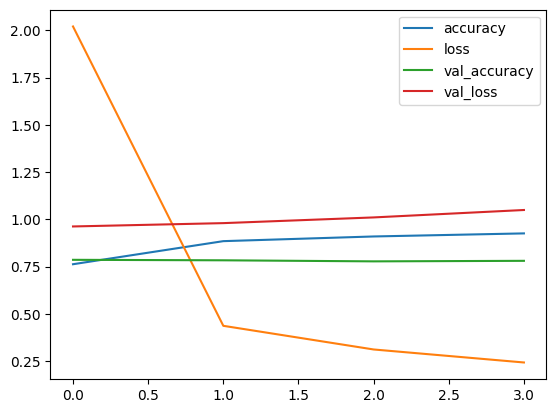

In [56]:
pd.DataFrame(history.history).plot()

In [47]:
len(base_pretrain_model.layers)

740

In [50]:
## Unfreeze some layers and retrain
for layer in base_pretrain_model.layers[:75]:
    layer.trainable = True

In [57]:
optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-5)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=2)

history = model.fit(train_df, validation_data=val_df, epochs=10, callbacks=[early_stop])

Epoch 1/10


2025-01-23 18:38:57.034061: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_37518', 468 bytes spill stores, 468 bytes spill loads

2025-01-23 18:38:57.165583: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_37518', 80 bytes spill stores, 80 bytes spill loads

2025-01-23 18:38:57.392724: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_37518', 340 bytes spill stores, 340 bytes spill loads



1085/1086 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.8732 - loss: 0.4386  

2025-01-23 18:43:19.202817: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_37518', 636 bytes spill stores, 480 bytes spill loads

2025-01-23 18:43:19.365326: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_37518', 220 bytes spill stores, 220 bytes spill loads

2025-01-23 18:43:19.513854: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_37518', 112 bytes spill stores, 112 bytes spill loads



1086/1086 ━━━━━━━━━━━━━━━━━━━━ 334s 260ms/step - accuracy: 0.8733 - loss: 0.4384 - val_accuracy: 0.7701 - val_loss: 1.1200
Epoch 2/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 243s 223ms/step - accuracy: 0.9149 - loss: 0.2720 - val_accuracy: 0.7780 - val_loss: 1.0713
Epoch 3/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 242s 223ms/step - accuracy: 0.9236 - loss: 0.2396 - val_accuracy: 0.7856 - val_loss: 1.0444
Epoch 4/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 242s 223ms/step - accuracy: 0.9331 - loss: 0.2169 - val_accuracy: 0.7882 - val_loss: 1.0263
Epoch 5/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 242s 223ms/step - accuracy: 0.9366 - loss: 0.2014 - val_accuracy: 0.7923 - val_loss: 1.0184
Epoch 6/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 240s 221ms/step - accuracy: 0.9395 - loss: 0.1927 - val_accuracy: 0.7923 - val_loss: 1.0126
Epoch 7/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 242s 223ms/step - accuracy: 0.9423 - loss: 0.1831 - val_accuracy: 0.7925 - val_loss: 1.0039
Epoch 8/10
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 244s 225ms/step - accuracy: 0.9

In [59]:
model.save('pretrain_model.keras', overwrite=True)

## YOLO Model

### Outline for building
- Get Dataset Pascal VOC or whatever is said in paper
- Build loss function
- 

In [1]:
class YOLOLoss(tf.keras.losses.Loss):
    

SyntaxError: incomplete input (394256117.py, line 2)